https://leetcode.com/problems/convert-sorted-list-to-binary-search-tree/

In [96]:
%load_ext memory_profiler

In [137]:
from jupyterthemes import jtplot
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

import numpy as np


class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

        
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
def get_linkedlist(nums):
    node = None
    for num in reversed(nums):
        new_node = ListNode(num)
        new_node.next = node
        node = new_node
    return node

        
def plot_bst(root, depth=0, ax=None):
    
    if not root:
        return ax
    
    if not ax:
        fig, ax = plt.subplots()
        ax.invert_yaxis()
    
    if root.left:
        ax.plot([root.val, root.left.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.left, depth+1, ax)
    
    if root.right:
        ax.plot([root.val, root.right.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.right, depth+1, ax)
        
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.annotate(root.val, (root.val, depth-0.05))
    
    return ax

<IPython.core.display.Javascript object>


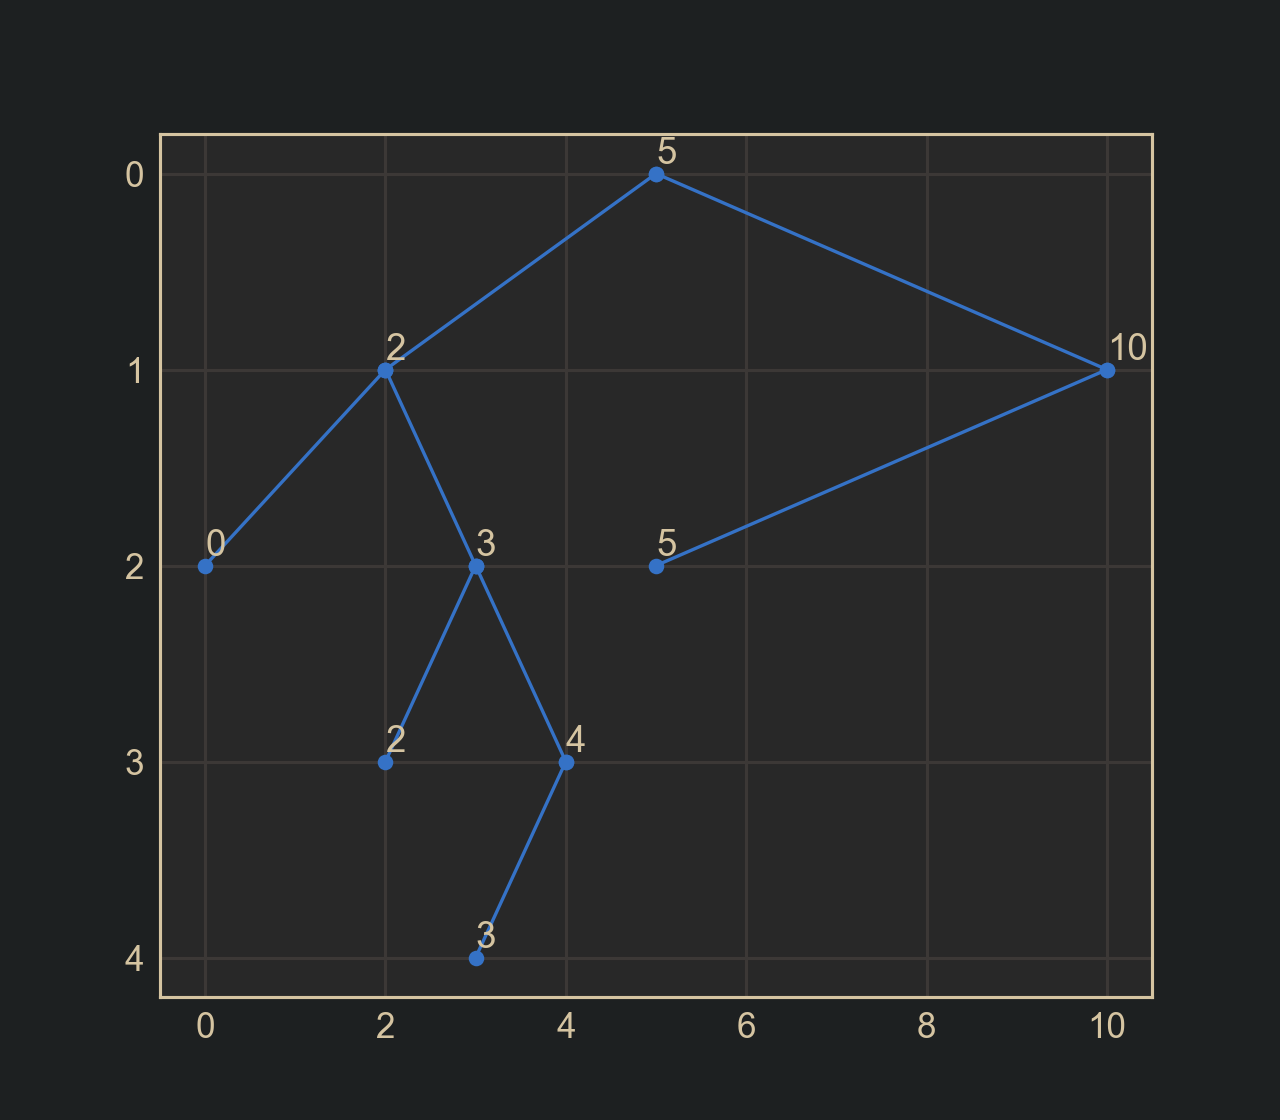

In [111]:
%matplotlib notebook

root = TreeNode(5)
root.left = TreeNode(2)
root.left.left = TreeNode(0)
root.left.right = TreeNode(3)
root.left.right.left = TreeNode(2)
root.left.right.right = TreeNode(4)
root.left.right.right.left = TreeNode(3)
root.right = TreeNode(10)
root.right.left = TreeNode(5)
#root.right.right = TreeNode(11)

ax = plot_bst(root)

# Solution 1: **Recursion**
#### **Time:** $O(N log N)$
#### **Space:** $O(log N)$

In [152]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        

class Solution:
    
    def split_linked_list(self, head):

        prev_pointer = None
        slow_pointer = head
        fast_pointer = head

        while fast_pointer and fast_pointer.next:
            prev_pointer = slow_pointer
            slow_pointer = slow_pointer.next
            fast_pointer = fast_pointer.next.next

        if prev_pointer:
            prev_pointer.next = None

        return slow_pointer
    
    
    def sortedListToBST(self, head):
        
        if not head:
            return None
        
        mid = self.split_linked_list(head)
        root = TreeNode(mid.val)
        
        if head == mid:
            return root
        
        root.left = self.sortedListToBST(head)
        root.right = self.sortedListToBST(mid.next)
        
        return root

<IPython.core.display.Javascript object>


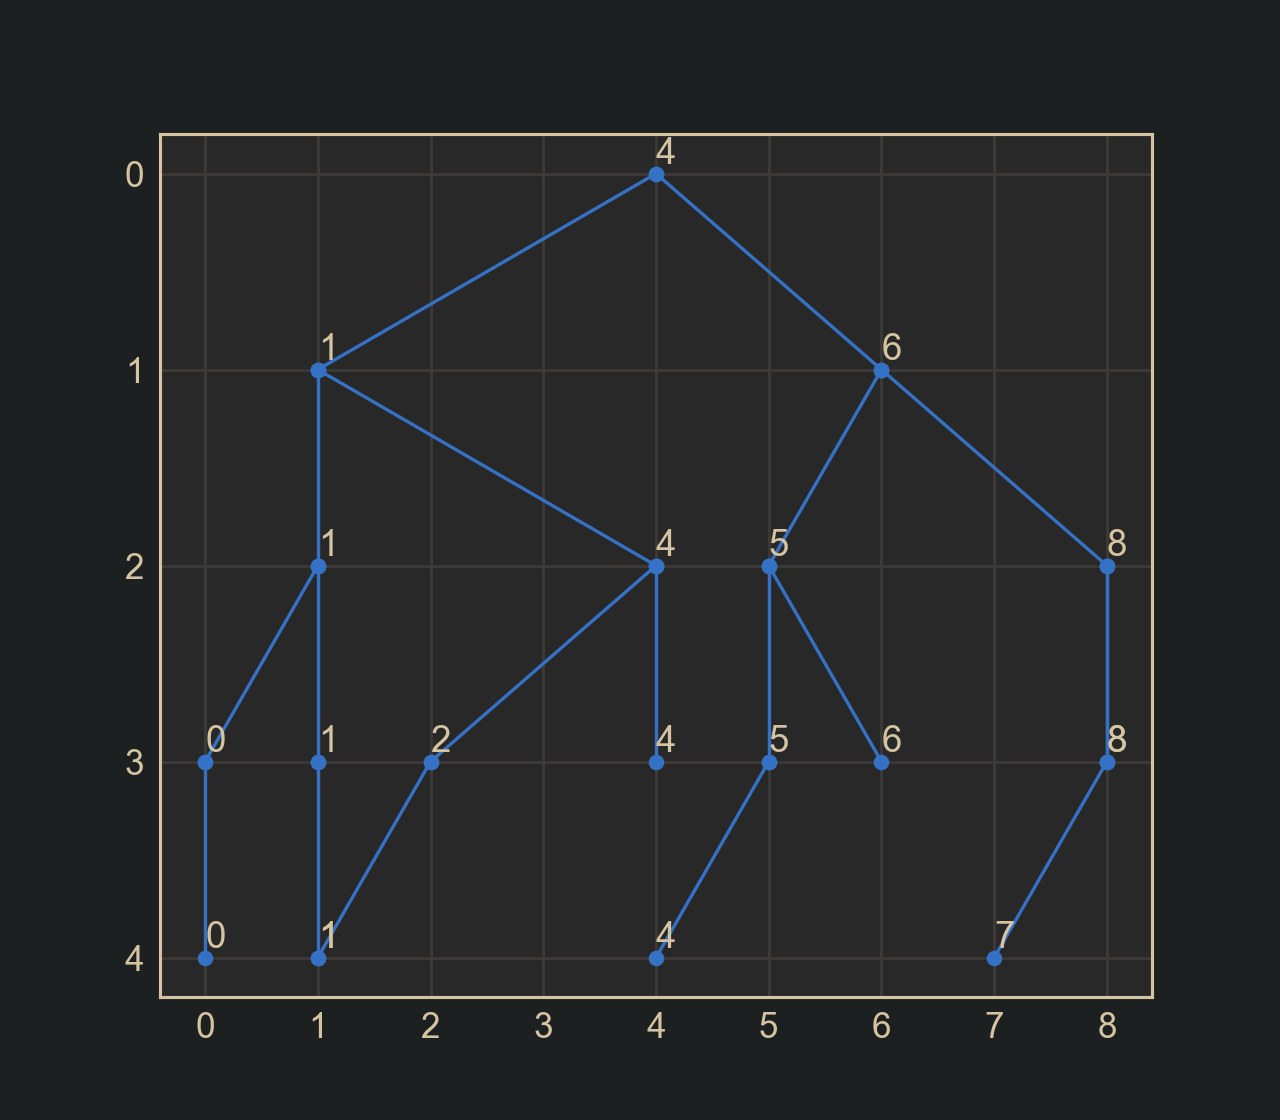

In [138]:
%matplotlib notebook

nums = sorted(np.random.randint(10, size=20))
node = get_linkedlist(nums)
    
root = Solution().sortedListToBST(node)
ax = plot_bst(root)

In [153]:
n = 1000
k = 10000
rstate = np.random.RandomState(0)

%timeit Solution().sortedListToBST(get_linkedlist(sorted(rstate.randint(n, size=n))))

2.18 ms ± 46.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
n = 1000
k = 10000
rstate = np.random.RandomState(0)

%memit Solution().sortedListToBST(get_linkedlist(sorted(rstate.randint(n, size=n))))

peak memory: 125.38 MiB, increment: 0.00 MiB


# Solution 2: **Recursion + Conversion to Array**
#### **Time:** $O(N)$
#### **Space:** $O(N)$

In [155]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
    
    
def list_to_arr(head):
    nums = []
    while head:
        nums.append(head.val)
        head = head.next
    return nums
        

class Solution:
    
    def sortedArrayToBST(self, nums):
        
        if not nums:
            return
        
        n = len(nums)
        k = n // 2
        
        root = TreeNode(nums[k])
        root.left = self.sortedArrayToBST(nums[:k]) if k > 0 else None
        root.right = self.sortedArrayToBST(nums[k+1:]) if k+1 < n else None
        
        return root
    
    def sortedListToBST(self, head):
        
        nums = list_to_arr(head)
        root = self.sortedArrayToBST(nums)
        
        return root

<IPython.core.display.Javascript object>


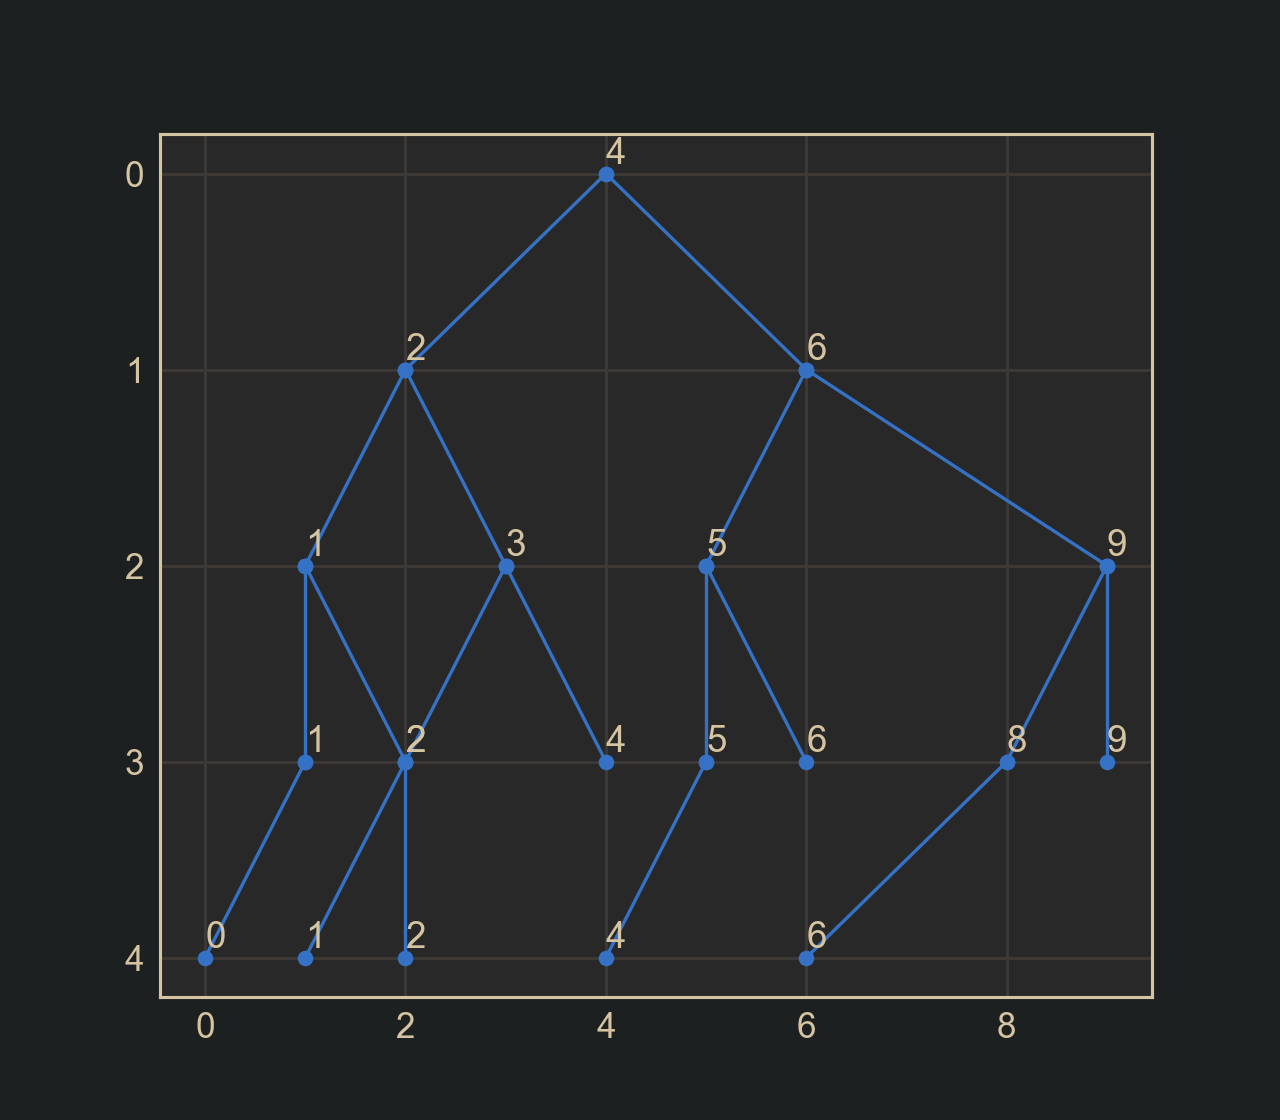

In [146]:
%matplotlib notebook

nums = sorted(np.random.randint(10, size=20))
node = get_linkedlist(nums)
    
root = Solution().sortedListToBST(node)
ax = plot_bst(root)

In [156]:
n = 1000
k = 10000
rstate = np.random.RandomState(0)

%timeit Solution().sortedListToBST(get_linkedlist(sorted(rstate.randint(n, size=n))))

1.9 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [157]:
n = 1000
k = 10000
rstate = np.random.RandomState(0)

%memit Solution().sortedListToBST(get_linkedlist(sorted(rstate.randint(n, size=n))))

peak memory: 125.41 MiB, increment: 0.00 MiB


# Solution 3: **Inorder Simulation**
#### **Time:** $O(N)$
#### **Space:** $O(log N)$

In [449]:
from itertools import chain, product
from functools import cmp_to_key


# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
def compare_steps(A, B):
    
    for a, b in zip(A, B):
        if a != b:
            return 1 if a > b else -1        
    else:
        if len(A) == len(B): return 0
        elif len(A) < len(B): return -1 if B[len(A)] else -1
        elif len(A) > len(B): return 1 if A[len(B)] else -1
        
        
def get_steps(k):
    return product({0, 1}, repeat=k)
        

class Solution:
    
    def get_size(self, head):
        size = 0
        while head:
            head = head.next
            size = size + 1
        return size
    
    
    def sortedListToBST(self, head):
        
        if not head:
            return None
        
        size = self.get_size(head)        
        depth = len(bin(size))-2
        root = TreeNode(None)
        
        steps_list = list(chain(*[get_steps(k) for k in range(depth)]))[:size]
        steps_list = sorted(steps_list, key=cmp_to_key(compare_steps))
        
        for steps in steps_list:

            # find next node
            node = root
            for step in steps:
                attr = 'right' if step else 'left'
                if not getattr(node, attr): setattr(node, attr, TreeNode(None))
                node = getattr(node, attr)
            
            # set value
            node.val = head.val
            head = head.next
            
        return root

<IPython.core.display.Javascript object>


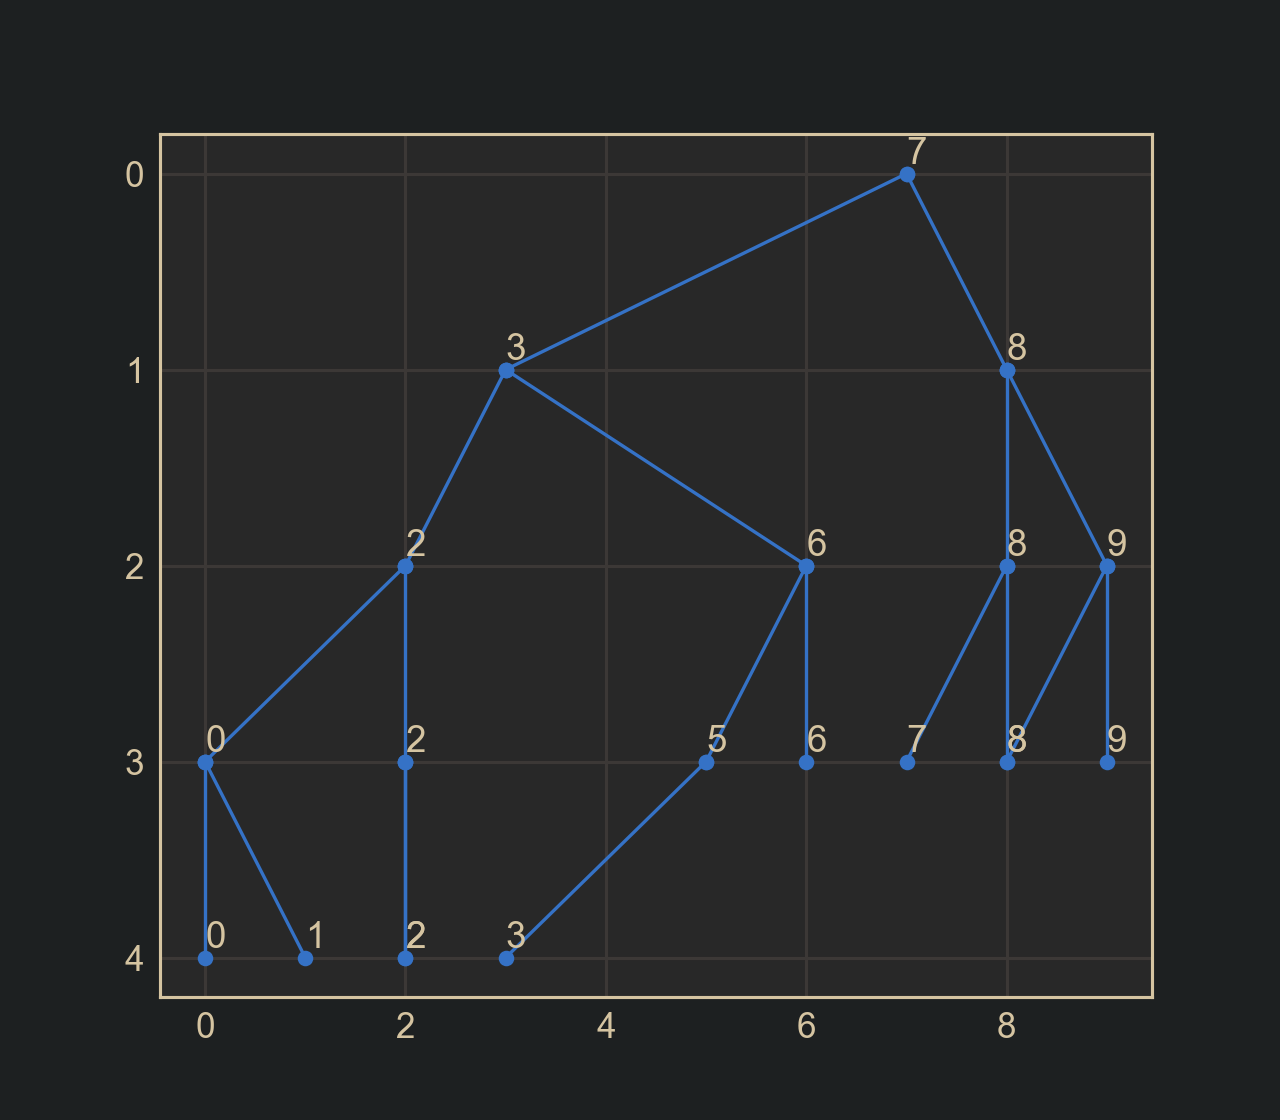

In [452]:
%matplotlib notebook

nums = sorted(np.random.randint(10, size=20))
node = get_linkedlist(nums)
    
root = Solution().sortedListToBST(node)
ax = plot_bst(root)

In [453]:
n = 1000
k = 10000
rstate = np.random.RandomState(0)

%timeit Solution().sortedListToBST(get_linkedlist(sorted(rstate.randint(n, size=n))))

6.94 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [454]:
n = 1000
k = 10000
rstate = np.random.RandomState(0)

%memit Solution().sortedListToBST(get_linkedlist(sorted(rstate.randint(n, size=n))))

peak memory: 141.13 MiB, increment: -0.16 MiB
